## Machine Learning - Session 4 -  Data Exploration and Data Manipulation

## Part 1 - Data Exploration

In [2]:
# Set the working directory
import os
os.chdir(r"C:\Users\Abhishek\Downloads")

#Read the cars.csv data
import pandas as pd
import numpy as np
cars = pd.read_csv("cars.csv")
cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US


In [3]:
cars.head(1)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US


#### 1. Summaries and Aggregates

In [3]:
#A. The describe() method
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
# at least 75% cars "under our analysis"(in our sample)

(2979-2*847, 2979+2*847)

(1285, 4673)

In [5]:
# 25% of cars in our sample ahbe weight lesser tahn 2226.5pounds
# 50% of cars under our analysis have weight lesser than 2822.5pounds
# 75% of cars under our analysis have weight lesser than 3618.250pounds
#  or
# only 25% of the cars under our analysis have weight greater than 3618pounds

# the heaviest car under our analysis is 5140pounds


# mean is greater than the median in our analysis: this indicates that the distribution of the variable "weight" has a long tail towards the right i.e positive skewed
# same indicated by quartiles diff bet. Q2 and Q1 is 596: and Q3-Q2 is 796 approximately these indicate taht dATA is not symmetric
#  ("no further comment on symmetric assumptions") until we look at the graphs( histograms and boxplot)

# 50 %(200approx.) of the cars under our analysis has weight between 2226pounds and 3618pounds.
# 25% of the cars under our analysis has weight between 1613.0pounds and 2226pounds.

# range of the data is between 5140pound and 1613pound

# IQR is 3618-2226 that is 1392.

In [6]:
cars.MPG.describe()

count    406.000000
mean      23.051232
std        8.401777
min        0.000000
25%       17.000000
50%       22.350000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

In [7]:
# (mean +/- k*SD)    chebyshev's rule for distrubution states taht 75% of data lie bwteewn maean +/- 2sd . 
#how spread iur dataset  is....

# the % of observationsn that lie  within (mean +/- k*SD) is at least (1- 1/k**2)*100%, k>1

In [16]:
(1- 1/2**2)* 100

75.0

In [8]:
cars.Weight.describe()

count     406.000000
mean     2979.413793
std       847.004328
min      1613.000000
25%      2226.500000
50%      2822.500000
75%      3618.250000
max      5140.000000
Name: Weight, dtype: float64

In [9]:
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
cars.mean()

C:\Users\Abhishek\AppData\Local\Temp/ipykernel_20364/1764053374.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.mean()


MPG               23.051232
Cylinders          5.475369
Displacement     194.779557
Horsepower       103.529557
Weight          2979.413793
Acceleration      15.519704
Model             75.921182
dtype: float64

In [11]:
cars[["MPG","Weight","Cylinders"]].mean()

MPG            23.051232
Weight       2979.413793
Cylinders       5.475369
dtype: float64

In [12]:
cars.std()

C:\Users\Abhishek\AppData\Local\Temp/ipykernel_20364/2703001680.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.std()


MPG               8.401777
Cylinders         1.712160
Displacement    104.922458
Horsepower       40.520659
Weight          847.004328
Acceleration      2.803359
Model             3.748737
dtype: float64

In [13]:
k=2
(1-1/k**2)*100
# 


75.0

In [14]:
k=3
(1-1/k**2)*100


88.88888888888889

In [15]:
cars["Weight"].mean()

2979.4137931034484

In [16]:
cars.Weight.mean()

2979.4137931034484

In [18]:
#A. Aggregates - groupby() method
cars[["Weight","Model"]].groupby(["Model"]).mean()

,Weight
Model,
70,3441.314286
71,2960.344828
72,3237.714286
73,3419.025000
74,2877.925926
75,3176.800000
76,3078.735294
77,2997.357143
78,2861.805556


In [18]:
cars[["Weight","Origin"]].groupby(["Origin"]).mean()

,Weight
Origin,
Europe,2431.493151
Japan,2221.227848
US,3372.700787


In [9]:
# conditional mean
# cars.mean(Weight | Origin = Europe)
# mean(Weight | Origin = Japan)

In [20]:
cars[["MPG","Weight","Origin"]].groupby(["Origin"]).mean()

,MPG,Weight
Origin,,
Europe,26.745205,2431.493151
Japan,30.450633,2221.227848
US,19.688189,3372.700787


In [21]:
cars[["MPG","Weight","Cylinders","Acceleration"]].groupby(["Cylinders"]).median()

,MPG,Weight,Acceleration
Cylinders,,,
3,20.25,2375.0,13.5
4,28.00,2234.0,16.2
5,25.40,2950.0,19.9
6,19.00,3201.5,16.1
8,14.00,4137.5,13.0


In [22]:
cars[["MPG","Weight","Cylinders","Acceleration","Origin"]].groupby(["Cylinders","Origin"]).median()

MPG  Weight  Acceleration
Cylinders Origin                             
3         Japan   20.25  2375.0         13.50
4         Europe  26.50  2219.5         15.50
          Japan   32.00  2130.0         16.50
          US      27.00  2408.0         16.30
5         Europe  25.40  2950.0         19.90
6         Europe  16.75  3285.0         16.25
          Japan   23.10  2905.0         13.65
          US      19.00  3239.0         16.45
8         US      14.00  4137.5         13.00

In [23]:
cars[["MPG","Weight","Cylinders","Acceleration","Origin"]].groupby(["Cylinders","Origin","MPG"]).mean()

Weight  Acceleration
Cylinders Origin MPG                            
3         Japan  18.0  2124.000000     13.500000
                 19.0  2330.000000     13.500000
                 21.5  2720.000000     13.500000
                 23.7  2420.000000     12.500000
4         Europe 0.0   2622.666667     17.633333
...                            ...           ...
8         US     20.0  3221.000000     13.500000
                 20.2  3570.000000     12.800000
                 23.0  3900.000000     17.400000
                 23.9  3420.000000     22.200000
                 26.6  3725.000000     19.000000

[205 rows x 2 columns]

In [24]:
# median(Weight | Origin = Europe & Cylinders = 4) = 2219.5

In [25]:
cars[["MPG","Weight","Cylinders","Acceleration","Origin"]].groupby(["Cylinders","Origin"]).mean()

MPG       Weight  Acceleration
Cylinders Origin                                      
3         Japan   20.550000  2398.500000     13.250000
4         Europe  27.119697  2343.318182     16.763636
          Japan   31.595652  2153.492754     16.569565
          US      27.840278  2437.166667     16.526389
5         Europe  27.366667  3103.333333     18.633333
6         Europe  20.100000  3382.500000     16.425000
          Japan   23.883333  2882.000000     13.550000
          US      19.663514  3213.905405     16.474324
8         US      14.270370  4105.194444     12.837037

#### 2. Tables (Crosstabs)

In [26]:
#A. Univariate Frequency distribution of a categorical variable (say, Origin)
tab = pd.crosstab(cars.Origin,columns ="Counts")
tab


col_0,Counts
Origin,
Europe,73
Japan,79
US,254


In [27]:
#B. Univariate table of proportion
n = len(cars)
tab/n


col_0,Counts
Origin,
Europe,0.179803
Japan,0.194581
US,0.625616


In [28]:
#B. Univariate table of proportion
round(tab/n*100,2)


col_0,Counts
Origin,
Europe,17.98
Japan,19.46
US,62.56


In [29]:
#C. Bi-variate Frequency Distribution Table
table = pd.crosstab(cars.Origin,columns=cars.Cylinders)
table


Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


In [30]:
#Re-Naming the Rows and Columns


In [31]:
#Finding the col-sums(column marginal sums)
coltotal = table.sum(axis=0)
coltotal

Cylinders
3      4
4    207
5      3
6     84
8    108
dtype: int64

In [32]:
#Finding the row sums(row marginal sums)
rowtotal = table.sum(axis =1)
rowtotal


Origin
Europe     73
Japan      79
US        254
dtype: int64

In [33]:
#D. Table od joint proportion
table/len(cars)


Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.162562,0.007389,0.009852,0.00000
Japan,0.009852,0.169951,0.000000,0.014778,0.00000
US,0.000000,0.177340,0.000000,0.182266,0.26601


In [34]:
#OR
#1. p(four cyl vechile originating in europe) = 0.1625(incorrect)
#2. p(cars originating in Eu having four cyl) = 0.1625(wrong)

#3. p(cars having four cyl & originating in Eu)= 0.1625(correct)

#1 out of all cars originating in Eu,p(four cyl cars) = 0.1625
# p(cyl =4 | Origin = Eu)
# 2 out of all cars having 4 cyl,p(origin = Eu) = 0.1625
# p(Origin =Eu | Cyl =4)
#3 Joint proportion
# p(Origin = Eu & Cyl =4) = 0.1625
# probability of cars originating in europe and having 4 cylinders is 0.1625

In [35]:
#E. Table of conditional proportion (Conditioned on rows)---[p(cyl|origin)]
# prob. of a 4 cyl cars originating in europe is 0.904 or out of all cars originated in eu 90.4% have 4 cylinders
#out of all cars originating in eu ,90.4% cars have 4 cyl
table.div(rowtotal,axis=0)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.904110,0.041096,0.054795,0.000000
Japan,0.050633,0.873418,0.000000,0.075949,0.000000
US,0.000000,0.283465,0.000000,0.291339,0.425197


In [36]:
#F. Table of conditional proportion (conditioned on columns)----[p(origin|cyl)]
# out of all the cars having[x] cyl ,[p]% of them originate in[origin]
#out of all acrs having 4 cyl ,33.3% cars originated in japan
table.div(coltotal,axis =1)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.0,0.318841,1.0,0.047619,0.0
Japan,1.0,0.333333,0.0,0.071429,0.0
US,0.0,0.347826,0.0,0.880952,1.0


In [37]:
#table.div(coltotal,axis =1)

#### 3. Graphs

In [19]:
import matplotlib.pyplot as plt

#### 3A. Histograms

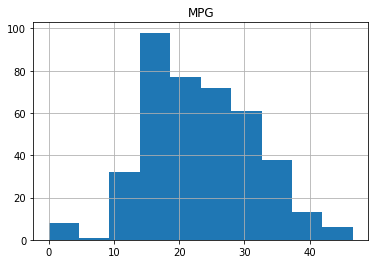

In [39]:
#histogram of MPG
cars.MPG.describe()
cars.hist(column = "MPG")
plt.show()


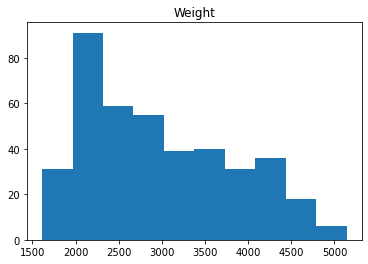

In [64]:
#Additional arguments: 
cars.hist(column="Weight",
          grid = False,        # do not include the grid ,keep it to true to include the grid
          figsize =(6,4),      #(lenght,height) of the plot in inches
          bins=10)             # no of bulidings blocks u want to keep .
plt.show()

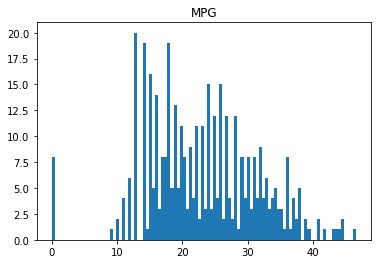

In [66]:
#Additional arguments: 
cars.hist(column="MPG",
          grid = False,        # do not include the grid ,keep it to true to include the grid
          figsize =(6,4),      #(lenght,height) of the plot in inches
          bins=100)             # no of bulidings blocks u want to keep if u keep bin value high data will be smooth and u will loose a lot of interpretations
plt.show()

Text(0.5, 1.0, 'Histogram of MPG')

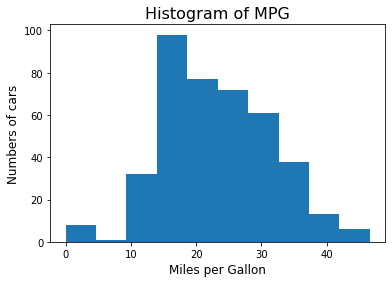

In [68]:
cars.hist(column="MPG",
          grid = False,        # do not include the grid ,keep it to true to include the grid
          figsize =(6,4),      #(lenght,height) of the plot in inches
          bins=10)             # no of bulidings blocks u want to keep if u keep bin value high data will be smooth and u will loose a lot of interpretations
plt.xlabel("Miles per Gallon",fontsize =12)
plt.ylabel("Numbers of cars", fontsize = 12)
plt.title("Histogram of MPG" , fontsize =16)
plt.show()

In [1]:
901/1470

0.6129251700680272

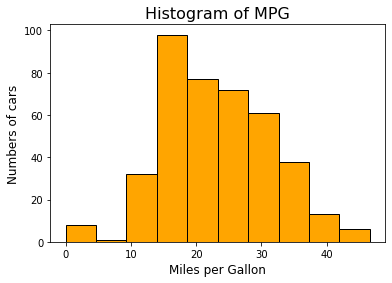

In [69]:
cars.hist(column="MPG",
          grid = False,        # do not include the grid ,keep it to true to include the grid
          figsize =(6,4),
          color ="orange" ,
          edgecolor ="black",   #(lenght,height) of the plot in inches
          bins=10)               # no of bulidings blocks u want to keep if u keep bin value high data will be smooth and u will loose a lot of interpretations
plt.xlabel("Miles per Gallon",fontsize =12)
plt.ylabel("Numbers of cars", fontsize = 12)
plt.title("Histogram of MPG" , fontsize =16)
plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html*

In [41]:
#Labelling the axes and giving the title



In [42]:
#Editing color and edgecolor



In [43]:
#Breaking up by the categories of a categorical variable




#### 3B. Boxplots

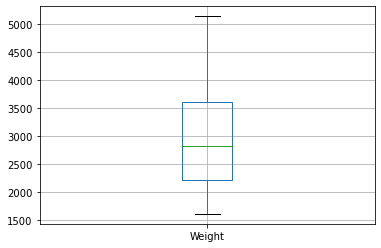

In [70]:
#Plotting a boxplot for the variable MPG
cars.boxplot(column="Weight")
plt.show()


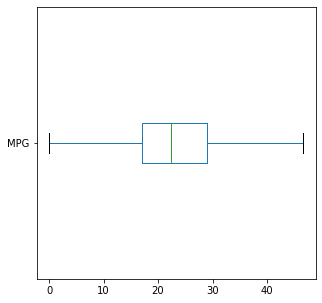

In [71]:
#Additional arguments (horizontal boxplot)
cars.boxplot(column = "MPG",
            grid = False,
            figsize= (5,5),
            vert= False)          # to plot a horizontal boxplot
plt.show()


*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html*

In [46]:
#Labelling the boxplot



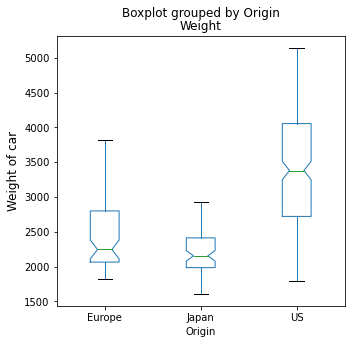

In [73]:
#Side by Side boxplot
cars.boxplot(column = "Weight", notch = True,
             by= "Origin",
            grid = False,
            figsize= (5,5))          # to plot a horizontal boxplot
plt.ylabel("Weight of car", fontsize = 12)
plt.show()


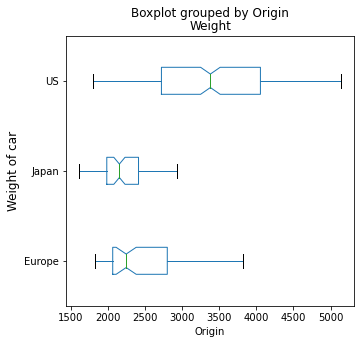

In [6]:
#Side by Side boxplot
cars.boxplot(column = "Weight", notch = True,
             by= "Origin",
            grid = False,
            figsize= (5,5),
            vert = False)          # to plot a horizontal boxplot
plt.ylabel("Weight of car", fontsize = 12)
plt.show()


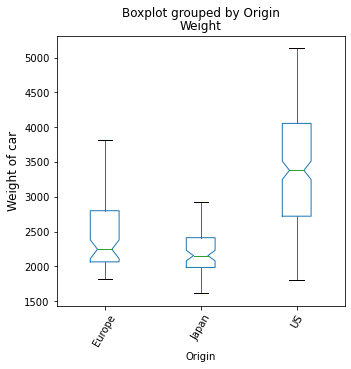

In [7]:
#The rotation argument
#Side by Side boxplot
#Side by Side boxplot
cars.boxplot(column = "Weight", notch = True,
             by= "Origin",
            grid = False,                       # to plot a horizontal boxplot
            figsize= (5,5),
            rot = 60)                          # the angle by which we want to rotate the labels
plt.ylabel("Weight of car", fontsize = 12)
plt.show()




#### 3C. Bar Plots

In [8]:
cars["Origin"].value_counts()

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

In [9]:
type(cars["Origin"].value_counts())

pandas.core.series.Series

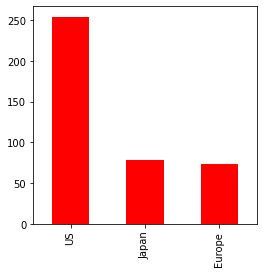

In [10]:
# value_counts() is used to get the frequency of the variable;
cars["Origin"].value_counts().plot(kind= 'bar',figsize=(4,4),
                                  color="Red",fontsize =10)
plt.show()

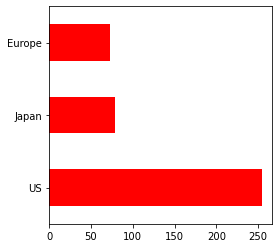

In [11]:
# barh- for horizontal bar
cars["Origin"].value_counts().plot(kind= 'barh',figsize=(4,4),
                                  color="Red",fontsize =10)
plt.show()

Study pandas.DataFrame.plot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

#### 3D. Scatter Plots

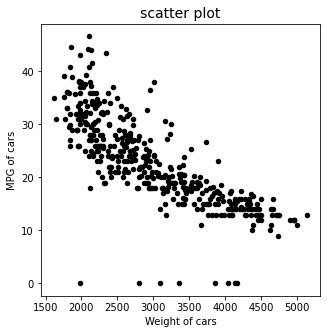

In [12]:
#Scatter plot 

cars.plot(kind="scatter",x="Weight",
         y="MPG",color="black",figsize=(5,5))   
plt.xlabel("Weight of cars",fontsize=10)
plt.ylabel("MPG of cars",fontsize =10)
plt.title("scatter plot", fontsize  =14)
plt.show()

**roughly**,as the weight of car inc. the MPG decreases.bivariate analysis
negetive correlated


In [15]:
np.corrcoef(cars.MPG,cars.Weight)

array([[ 1.        , -0.78750994],
       [-0.78750994,  1.        ]])

In [20]:
cars2 = cars.loc[cars.MPG>0, ]          #presence of outliers may effect correlation
                                         # when we remove outliers from data it will effect randomness of the  data
                                     # dimension play a big  role in interpreting so alway keep figsize imp.

In [ ]:
# pearson's corr. coeff measures only the linear association between two variables.


In [21]:
# correlation matrix
corr = cars.corr()
corr.style.background_gradient()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
MPG,1.000000,-0.735563,-0.764277,-0.726670,-0.787510,0.424490,0.586234
Cylinders,-0.735563,1.000000,0.951787,0.823467,0.895220,-0.522452,-0.360762
Displacement,-0.764277,0.951787,1.000000,0.873758,0.932475,-0.557984,-0.381714
Horsepower,-0.726670,0.823467,0.873758,1.000000,0.840811,-0.682047,-0.419929
Weight,-0.787510,0.895220,0.932475,0.840811,1.000000,-0.430086,-0.315389
Acceleration,0.424490,-0.522452,-0.557984,-0.682047,-0.430086,1.000000,0.301992
Model,0.586234,-0.360762,-0.381714,-0.419929,-0.315389,0.301992,1.000000


In [19]:
np.corrcoef(cars2.MPG,cars2.Weight)

array([[ 1.        , -0.83174093],
       [-0.83174093,  1.        ]])

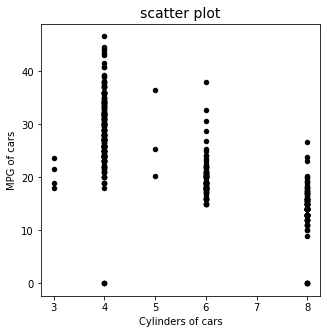

In [24]:
#Scatter plot 

cars.plot(kind="scatter",x="Cylinders",
         y="MPG",color="black",figsize=(5,5))   
plt.xlabel("Cylinders of cars",fontsize=10)
plt.ylabel("MPG of cars",fontsize =10)
plt.title("scatter plot", fontsize  =14)
plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html*

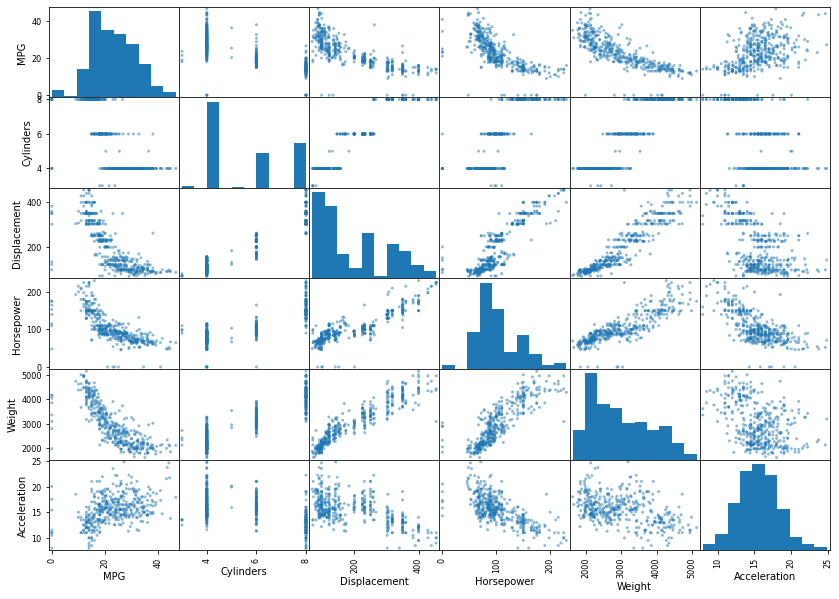

In [25]:
#Pairwise Scatterplot
from pandas.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Model","Origin"],axis=1),alpha=0.5,figsize=(14,10),
              diagonal='hist')
plt.show()

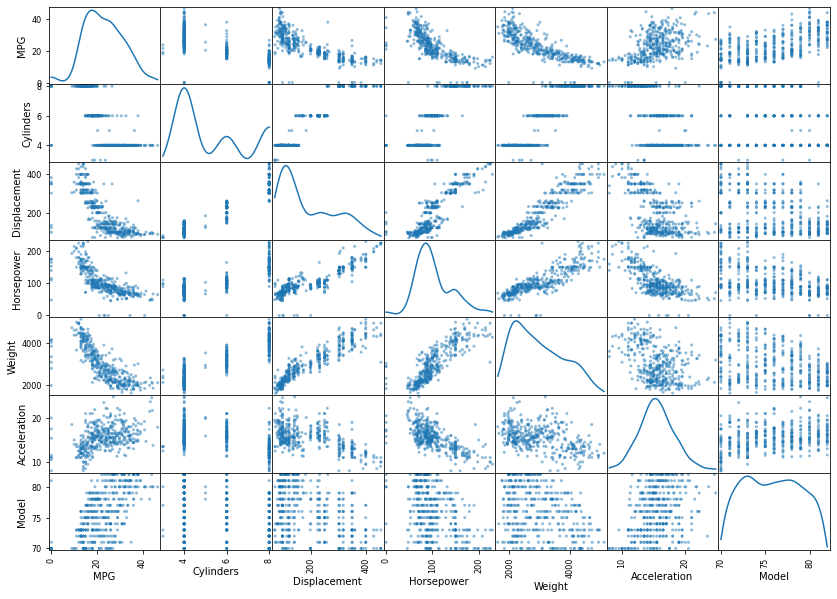

In [28]:
#Exporting Graph

from pandas.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Origin"],axis=1),alpha=0.5,figsize=(14,10),
              diagonal='kde')
plt.savefig('scatter.png')
#plt.show()

## Part 2 - Data Manipulation

#### 1. Sorting

In [5]:
#Sort the data in ascending order of MPG
cars.sort_values(by =["MPG"],axis=0, ascending=True)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
367,Saab 900s,0.0,4,121.0,110,2800,15.4,81,Europe
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
39,Volkswagen Super Beetle 117,0.0,4,97.0,48,1978,20.0,71,Europe
10,Citroen DS-21 Pallas,0.0,4,133.0,115,3090,17.5,70,Europe
...,...,...,...,...,...,...,...,...,...
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
332,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48,2085,21.7,80,Europe
336,Honda Civic 1500 gl,44.6,4,91.0,67,1850,13.8,80,Japan


In [6]:
#Sort the data in descending order of MPG
cars.sort_values(by =["MPG"],axis=0, ascending=False)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
329,Mazda GLC,46.6,4,86.0,65,2110,17.9,80,Japan
336,Honda Civic 1500 gl,44.6,4,91.0,67,1850,13.8,80,Japan
332,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48,2085,21.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe
...,...,...,...,...,...,...,...,...,...
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
367,Saab 900s,0.0,4,121.0,110,2800,15.4,81,Europe
39,Volkswagen Super Beetle 117,0.0,4,97.0,48,1978,20.0,71,Europe


In [8]:
#Sort the data in descending order of Origin and then by increasing order of MPG
cars.sort_values(by =["MPG","Origin"],axis=0, ascending=True)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
10,Citroen DS-21 Pallas,0.0,4,133.0,115,3090,17.5,70,Europe
39,Volkswagen Super Beetle 117,0.0,4,97.0,48,1978,20.0,71,Europe
367,Saab 900s,0.0,4,121.0,110,2800,15.4,81,Europe
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
...,...,...,...,...,...,...,...,...,...
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
332,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48,2085,21.7,80,Europe
336,Honda Civic 1500 gl,44.6,4,91.0,67,1850,13.8,80,Japan


In [55]:
#Saving in another data frame


#### 2. Variable Transformation

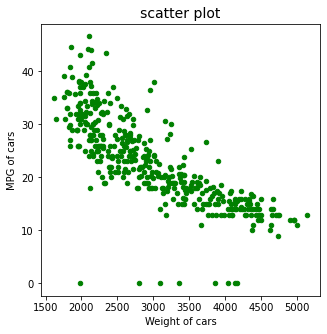

In [15]:
# Plot a scatter plot between MPG and weight. Comment of the linearity.


cars.plot(kind="scatter",x="Weight",
         y="MPG",color="green",figsize=(5,5))   
plt.xlabel("Weight of cars",fontsize=10)
plt.ylabel("MPG of cars",fontsize =10)
plt.title("scatter plot", fontsize  =14)
plt.show()


<AxesSubplot:xlabel='Weight', ylabel='MPG'>

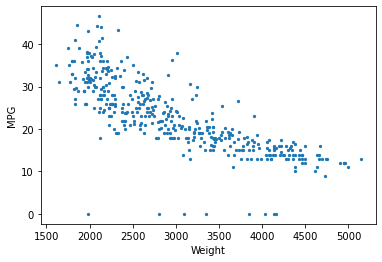

In [12]:
cars.plot.scatter("Weight","MPG",s=5)

In [ ]:
# there is a roughly negetive correlation b/w  MPG and Weight

In [57]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?


In [58]:
# But there is a problem! Check the summary of log(MPG). What do you observe?


In [59]:
# Can you identify where we got misleaded? Probably the answer lies in the summary of MPG.
# How can we correct this?


In [60]:
# Study the association between MPG and Horsepower. (Do Yourself)



#### The np.where() function


In [61]:
import numpy as np

In [62]:
# PROBLEM 1:
# Create a variable HP which will take only two values:
# IF Horsepower < 100 THEN "Low HP"
# IF Horsepower >= 100 THEN "High HP"



In [63]:
#PROBLEM 2:
# Create a Variable MPG_Rate which will take on the values as follows:
# IF MPG < 15 THEN "Normal"
# IF MPG >= 15 AND MPG <=25 THEN "GOOD"
# IF MPG >= 25 AND MPG <=35 THEN "GREAT"
# IF MPG >= 35 THEN "AWESOME"


